# Importing Libraries & read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('data/Olympic.csv')
data.head()

,Unnamed: 0,edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,0,summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1,summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,2,summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,3,summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,4,summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [3]:
data.drop(columns='Unnamed: 0',inplace=True)

In [4]:
data.head()

,edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


# Explore Data

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36929 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   edition     36929 non-null  object  
 1   Year        36929 non-null  int64   
 2   City        36929 non-null  object  
 3   Sport       36929 non-null  object  
 4   Discipline  36929 non-null  object  
 5   Athlete     36929 non-null  object  
 6   Code        36929 non-null  object  
 7   Gender      36929 non-null  object  
 8   Event       36929 non-null  object  
 9   Medal       36929 non-null  category
 10  Country     36929 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 3.1+ MB


In [67]:
#convert the Column Medal from object to category
data['Medal']=data['Medal'].astype('category')
data['Medal']

0          Gold
1        Silver
2        Bronze
3          Gold
4        Silver
          ...  
36926    Bronze
36927      Gold
36928    Silver
36929      Gold
36930    Bronze
Name: Medal, Length: 36929, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

In [68]:
#ordered Medal to (Bronze < Silver < Gold)
data.Medal.cat.set_categories(['Bronze', 'Silver', 'Gold'],ordered=True , inplace=True )

C:\Users\EL King\AppData\Local\Temp\ipykernel_6356\3180034795.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  data.Medal.cat.set_categories(['Bronze', 'Silver', 'Gold'],ordered=True , inplace=True )


In [69]:
data.Medal.sort_values()

36930    Bronze
25568    Bronze
25565    Bronze
25562    Bronze
11084    Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36929, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,36929.0,1972.956159,32.447268,1896.0,1952.0,1980.0,2000.0,2014.0


In [38]:
data.columns

Index(['edition', 'Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Code',
       'Gender', 'Event', 'Medal', 'Country'],
      dtype='object')

# Check Null Values & Duplicated Values

In [39]:
data.isna().sum()

edition       0
Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Code          0
Gender        0
Event         0
Medal         0
Country       0
dtype: int64

In [40]:
data.duplicated().sum()

0

In [41]:
data[data.duplicated()]

,edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country


In [42]:
data.drop_duplicates(inplace=True)

In [43]:
data.duplicated().sum()

0

# Data Analysis & Visualization

In [44]:
# how many of men and women & show it in visualize
data['Gender'].value_counts()

Men      26687
Women    10242
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

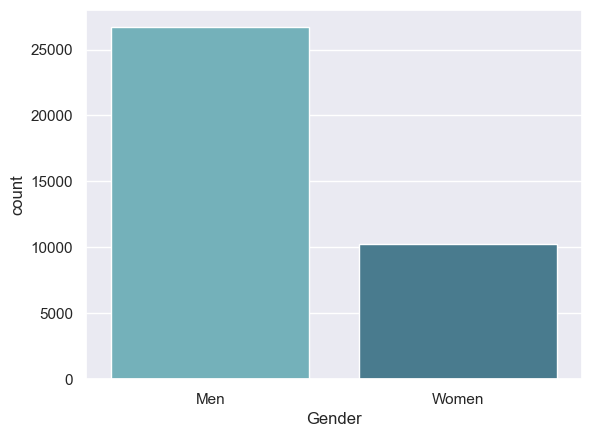

In [45]:
sns.countplot(x=data['Gender'],palette='GnBu_d')

## Explore Summer Edition

In [46]:
summer=data[data['edition']=='summer']
summer.head()

,edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


### The largest "Athlete" Won the Medal in Summer

In [47]:
# Mens, who won the Medal in summer
summer[summer['Gender']=='Men']['Athlete'].value_counts()

Michael Phelps              22
Nikolay Andrianov           15
Boris Shakhlin              13
Edoardo Mangiarotti         13
Takashi Ono                 13
                            ..
Michael Beaver Schoettle     1
Edgar Pardee Earle White     1
Sumner Wheeler Iii White     1
Börre Falkum-Hansen          1
Jimmy Lidberg                1
Name: Athlete, Length: 16926, dtype: int64

In [48]:
# the largest Men won the Medal in summer
summer[summer['Gender']=='Men']['Athlete'].value_counts().index[0]

'Michael Phelps'

In [49]:
# the number of Medal who won it
summer[summer['Gender']=='Men']['Athlete'].value_counts().values[0]

22

In [50]:
# Let's discover what does 'Michael Phelps' have of medals  
summer[summer.Athlete == 'Michael Phelps']

,edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
25225,summer,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,100M Butterfly,Gold,United States
25253,summer,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Butterfly,Gold,United States
25258,summer,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Freestyle,Bronze,United States
25265,summer,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Individual Medley,Gold,United States
25277,summer,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,400M Individual Medley,Gold,United States
25286,summer,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,4X100M Freestyle Relay,Bronze,United States
25325,summer,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,4X100M Medley Relay,Gold,United States
25361,summer,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,4X200M Freestyle Relay,Gold,United States
27224,summer,2008,Beijing,Aquatics,Swimming,Michael Phelps,USA,Men,100M Butterfly,Gold,United States
27252,summer,2008,Beijing,Aquatics,Swimming,Michael Phelps,USA,Men,200M Butterfly,Gold,United States


In [51]:
#the number of Medals type which "Michael Phelps"  earned it in Swimming Sport 
men_top=summer[summer['Athlete']=='Michael Phelps']['Medal'].value_counts()
men_top

Gold      18
Bronze     2
Silver     2
Name: Medal, dtype: int64

<Axes: >

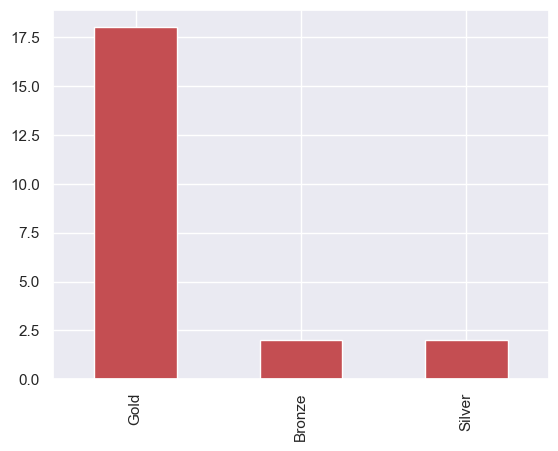

In [52]:
men_top.plot.bar(color='r')

In [53]:
# womens, who won the Medal in summer
summer[summer['Gender']=='Women']['Athlete'].value_counts()

Larisa Latynina     18
Dara Torres         12
Jenny Thompson      12
Natalie Coughlin    12
Birgit Fischer      12
                    ..
Celestina Popa       1
Eugenia Golea        1
Aurelia Dobre        1
Olga Strazheva       1
Maider Unda          1
Name: Athlete, Length: 5836, dtype: int64

In [54]:
#The largest Woman won the Medal in summer
summer[summer['Gender']=='Women']['Athlete'].value_counts().index[0]

'Larisa Latynina'

In [55]:
# the number of Medal who win it
summer[summer['Gender']=='Women']['Athlete'].value_counts().values[0]

18

In [56]:
# Let's discover what does 'Larisa Latynina' have of medals  
summer[summer.Athlete == 'Larisa Latynina']

,edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
9445,summer,1956,Melbourne / Stockholm,Gymnastics,Artistic G.,Larisa Latynina,URS,Women,Floor Exercises,Gold,Soviet Union
9453,summer,1956,Melbourne / Stockholm,Gymnastics,Artistic G.,Larisa Latynina,URS,Women,Individual All-Round,Gold,Soviet Union
9493,summer,1956,Melbourne / Stockholm,Gymnastics,Artistic G.,Larisa Latynina,URS,Women,Team Competition,Gold,Soviet Union
9507,summer,1956,Melbourne / Stockholm,Gymnastics,Artistic G.,Larisa Latynina,URS,Women,"Team, Portable Apparatus",Bronze,Soviet Union
9528,summer,1956,Melbourne / Stockholm,Gymnastics,Artistic G.,Larisa Latynina,URS,Women,Uneven Bars,Silver,Soviet Union
9534,summer,1956,Melbourne / Stockholm,Gymnastics,Artistic G.,Larisa Latynina,URS,Women,Vault,Gold,Soviet Union
10353,summer,1960,Rome,Gymnastics,Artistic G.,Larisa Latynina,URS,Women,Balance Beam,Silver,Soviet Union
10358,summer,1960,Rome,Gymnastics,Artistic G.,Larisa Latynina,URS,Women,Floor Exercises,Gold,Soviet Union
10367,summer,1960,Rome,Gymnastics,Artistic G.,Larisa Latynina,URS,Women,Individual All-Round,Gold,Soviet Union
10405,summer,1960,Rome,Gymnastics,Artistic G.,Larisa Latynina,URS,Women,Team Competition,Gold,Soviet Union


In [57]:
#the number of Medals type which "Larisa Latynina"  earned it in   Artistic G Sport and visualiza it
women_top=summer[summer['Athlete']=='Larisa Latynina']['Medal'].value_counts()
women_top

Gold      9
Silver    5
Bronze    4
Name: Medal, dtype: int64

<Axes: >

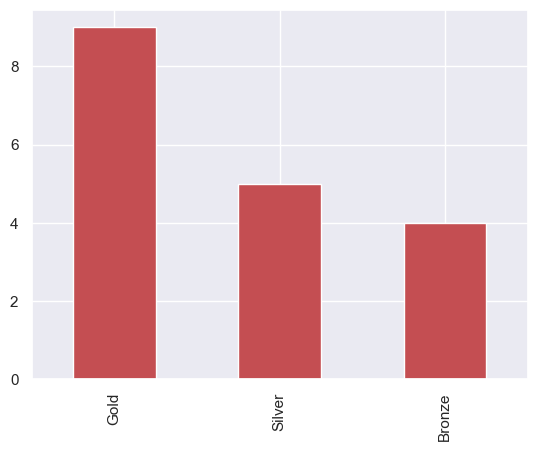

In [58]:
women_top.plot.bar(color='r')

In [73]:
top_medal=summer.groupby(['Athlete','Gender','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
top_medal

,Athlete,Gender,Medal,Sport
88790,Michael Phelps,Men,Gold,18
84986,Mark Spitz,Men,Gold,9
98222,Paavo Nurmi,Men,Gold,9
18002,Carl Lewis,Men,Gold,9
75617,Larisa Latynina,Women,Gold,9
...,...,...,...,...
50419,Heinz Förstendorf,Men,Silver,0
50417,Heinz Büker,Women,Gold,0
50416,Heinz Büker,Women,Silver,0
50415,Heinz Büker,Women,Bronze,0


In [74]:
# largest player achieve Gold // largest player achieve Bronze // largest player achieve Silver
top_medal=top_medal.drop_duplicates(subset=['Medal'],keep='first').reset_index(drop=True)
top_medal

,Athlete,Gender,Medal,Sport
0,Michael Phelps,Men,Gold,18
1,Alexei Nemov,Men,Bronze,6
2,Shirley Farber Babashoff,Women,Silver,6


## Explore Winter Edition

In [75]:
winter = data[data['edition']=='winter']
winter.head()

,edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
31161,winter,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France
31162,winter,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France
31163,winter,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France
31164,winter,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France
31165,winter,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold,Switzerland


In [76]:
winter['Athlete']=winter['Athlete'].str.split(', ').str[::-1].str.join(" ")
winter['Athlete']

C:\Users\EL King\AppData\Local\Temp\ipykernel_6356\3455152036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter['Athlete']=winter['Athlete'].str.split(', ').str[::-1].str.join(" ")


31161             G. BERTHET
31162          C. MANDRILLON
31163     Maurice MANDRILLON
31164         André VANDELLE
31165    Adolf AUFDENBLATTEN
                ...         
36926            Jenny JONES
36927         Jamie ANDERSON
36928      Dominique MALTAIS
36929            Eva SAMKOVA
36930        Chloe TRESPEUCH
Name: Athlete, Length: 5770, dtype: object

In [77]:
winter.head()

,edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
31161,winter,1924,Chamonix,Biathlon,Biathlon,G. BERTHET,FRA,Men,Military Patrol,Bronze,France
31162,winter,1924,Chamonix,Biathlon,Biathlon,C. MANDRILLON,FRA,Men,Military Patrol,Bronze,France
31163,winter,1924,Chamonix,Biathlon,Biathlon,Maurice MANDRILLON,FRA,Men,Military Patrol,Bronze,France
31164,winter,1924,Chamonix,Biathlon,Biathlon,André VANDELLE,FRA,Men,Military Patrol,Bronze,France
31165,winter,1924,Chamonix,Biathlon,Biathlon,Adolf AUFDENBLATTEN,SUI,Men,Military Patrol,Gold,Switzerland


### The largest "Athlete" Won the Medal in Winter

In [78]:
#  Mens,who won the Medal in Winter
winter[winter['Gender']=='Men']['Athlete'].value_counts()

Ole Einar BJOERNDALEN    13
Björn DAEHLIE            12
Sixten JERNBERG           9
Kjetil Andre AAMODT       8
Apolo Anton OHNO          8
                         ..
Henry BOUCHA              1
Kevin Joseph AHEARN       1
Aleksandr PACHKOV         1
Yuri BLINOV               1
Alex DEIBOLD              1
Name: Athlete, Length: 2687, dtype: int64

In [79]:
# the largest Men won the Medal in Winter
winter[winter['Gender']=='Men']['Athlete'].value_counts().index[0]

'Ole Einar BJOERNDALEN'

In [80]:
# number of Medal who earned its
winter[winter['Gender']=='Men']['Athlete'].value_counts().values[0]

13

In [81]:
# Let's discover what does 'Ole Einar BJOERNDALEN' have of medals  
winter[winter.Athlete == 'Ole Einar BJOERNDALEN']

,edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
34332,winter,1998,Nagano,Biathlon,Biathlon,Ole Einar BJOERNDALEN,NOR,Men,10KM,Gold,Norway
34349,winter,1998,Nagano,Biathlon,Biathlon,Ole Einar BJOERNDALEN,NOR,Men,4X7.5KM Relay,Silver,Norway
34779,winter,2002,Salt Lake City,Biathlon,Biathlon,Ole Einar BJOERNDALEN,NOR,Men,10KM,Gold,Norway
34785,winter,2002,Salt Lake City,Biathlon,Biathlon,Ole Einar BJOERNDALEN,NOR,Men,12.5Km Pursuit,Gold,Norway
34791,winter,2002,Salt Lake City,Biathlon,Biathlon,Ole Einar BJOERNDALEN,NOR,Men,20KM,Gold,Norway
34798,winter,2002,Salt Lake City,Biathlon,Biathlon,Ole Einar BJOERNDALEN,NOR,Men,4X7.5KM Relay,Gold,Norway
35270,winter,2006,Turin,Biathlon,Biathlon,Ole Einar BJOERNDALEN,NOR,Men,12.5Km Pursuit,Silver,Norway
35274,winter,2006,Turin,Biathlon,Biathlon,Ole Einar BJOERNDALEN,NOR,Men,15KM Mass Start,Bronze,Norway
35279,winter,2006,Turin,Biathlon,Biathlon,Ole Einar BJOERNDALEN,NOR,Men,20KM,Silver,Norway
35810,winter,2010,Vancouver,Biathlon,Biathlon,Ole Einar BJOERNDALEN,NOR,Men,20KM,Silver,Norway


In [82]:
#the number of Medals type which "Ole Einar BJOERNDALEN"  earned it in Biathlon Sport and visualiza it
top_men_winter=winter[winter['Athlete']=='Ole Einar BJOERNDALEN']['Medal'].value_counts()
top_men_winter

Gold      8
Silver    4
Bronze    1
Name: Medal, dtype: int64

<Axes: >

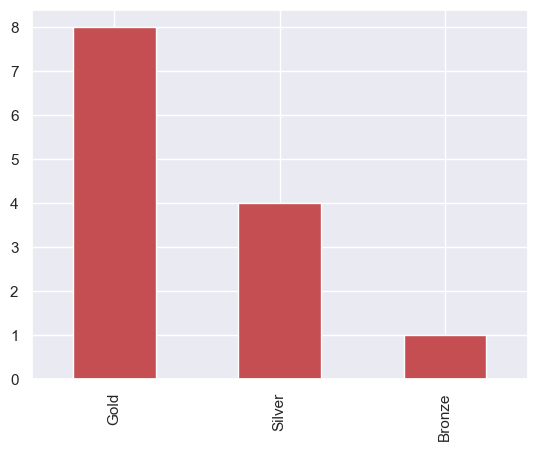

In [1296]:
top_men_winter.plot.bar(color='r')

In [1297]:
# womens,who won the Medal in Winter
winter[winter['Gender']=='Women']['Athlete'].value_counts()

Raisa SMETANINA       10
Stefania BELMONDO     10
Claudia PECHSTEIN      9
Ljubov EGOROVA         9
Uschi DISL             9
                      ..
Judy DIDUCK            1
Nancy DROLET           1
Katheryn MCCORMACK     1
Karen NYSTROM          1
Chloe TRESPEUCH        1
Name: Athlete, Length: 1074, dtype: int64

In [1298]:
# the largest women won the Medal in Winter
winter[winter['Gender']=='Women']['Athlete'].value_counts().index[0]

'Raisa SMETANINA'

In [1299]:
# number of Medal who earned its
winter[winter['Gender']=='Women']['Athlete'].value_counts().values[0]

10

In [1300]:
# Let's discover what does 'Raisa SMETANINA' have of medals  
winter[winter.Athlete == 'Raisa SMETANINA']

,edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
32912,winter,1976,Innsbruck,Skiing,Cross Country Skiing,Raisa SMETANINA,URS,Women,10KM,Gold,Soviet Union
32939,winter,1976,Innsbruck,Skiing,Cross Country Skiing,Raisa SMETANINA,URS,Women,4X5KM Relay,Gold,Soviet Union
32949,winter,1976,Innsbruck,Skiing,Cross Country Skiing,Raisa SMETANINA,URS,Women,5KM,Silver,Soviet Union
33161,winter,1980,Lake Placid,Skiing,Cross Country Skiing,Raisa SMETANINA,URS,Women,4X5KM Relay,Silver,Soviet Union
33166,winter,1980,Lake Placid,Skiing,Cross Country Skiing,Raisa SMETANINA,URS,Women,5KM,Gold,Soviet Union
33350,winter,1984,Sarajevo,Skiing,Cross Country Skiing,Raisa SMETANINA,URS,Women,10KM,Silver,Soviet Union
33356,winter,1984,Sarajevo,Skiing,Cross Country Skiing,Raisa SMETANINA,URS,Women,20KM,Silver,Soviet Union
33593,winter,1988,Calgary,Skiing,Cross Country Skiing,Raisa SMETANINA,URS,Women,10KM,Silver,Soviet Union
33597,winter,1988,Calgary,Skiing,Cross Country Skiing,Raisa SMETANINA,URS,Women,20KM,Bronze,Soviet Union
33934,winter,1992,Albertville,Skiing,Cross Country Skiing,Raisa SMETANINA,EUN,Women,4X5KM Relay,Gold,Unified Team


In [1301]:
#the number of Medals type which "Raisa SMETANINA"  earned it in Biathlon Sport and visualiza it
top_men_winter=winter[winter['Athlete']=='Raisa SMETANINA']['Medal'].value_counts()
top_men_winter

Silver    5
Gold      4
Bronze    1
Name: Medal, dtype: int64

<Axes: >

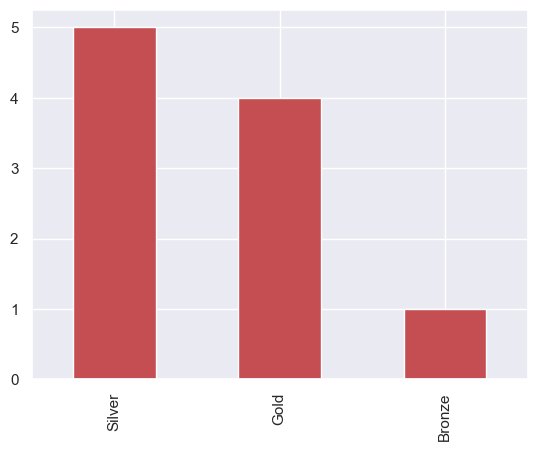

In [1302]:
top_men_winter.plot.bar(color='r')

In [83]:
top_medal_winter=winter.groupby(['Athlete','Gender','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
top_medal_winter

,Athlete,Gender,Medal,Sport
2564,Björn DAEHLIE,Men,Gold,8
15602,Ole Einar BJOERNDALEN,Men,Gold,8
7728,Harri KIRVESNIEMI,Men,Bronze,6
13427,Marit BJOERGEN,Women,Gold,6
12437,Lidiya SKOBLIKOVA,Women,Gold,6
...,...,...,...,...
8434,Igor MALKOV,Women,Silver,0
8433,Igor MALKOV,Women,Bronze,0
8430,Igor MALKOV,Men,Bronze,0
8429,Igor LIBA,Women,Gold,0


In [84]:
# largest player achieve Gold // largest player achieve Bronze // largest player achieve Silver
top_medal_winter.drop_duplicates(subset='Medal',keep='first').reset_index(drop=True)

,Athlete,Gender,Medal,Sport
0,Björn DAEHLIE,Men,Gold,8
1,Harri KIRVESNIEMI,Men,Bronze,6
2,Andrea EHRIG,Women,Silver,5


### The largest Country Score the Medal in summer

In [85]:
# number of medal which country achieve its in summer
summer['Country'].value_counts()

United States     4585
Soviet Union      2049
United Kingdom    1720
France            1396
Germany           1305
                  ... 
Cote d'Ivoire        1
Bermuda*             1
Niger                1
Iraq                 1
Gabon                1
Name: Country, Length: 144, dtype: int64

In [86]:
#Calculate the medals per each country for the best male and females athletes in all of the Summer editions and visualize the results
Medals_Country=summer.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
Medals_Country=Medals_Country.pivot('Country','Medal','Gender')
Medals_Country

C:\Users\EL King\AppData\Local\Temp\ipykernel_6356\4171660083.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  Medals_Country=Medals_Country.pivot('Country','Medal','Gender')


Medal,Bronze,Silver,Gold
Country,,,
Afghanistan,2,0,0
Algeria,8,2,5
Argentina,91,99,69
Armenia,8,2,1
Australasia,5,4,20
...,...,...,...
West Germany,180,167,143
West Indies Federation,5,0,0
Yugoslavia,118,174,143


In [87]:
top_10=Medals_Country.sort_values(by='Gold',ascending=False)[:11]
top_10

Medal,Bronze,Silver,Gold
Country,,,
United States,1098,1252,2235
Soviet Union,584,627,838
United Kingdom,553,621,546
Italy,404,416,476
Germany,475,378,452
Hungary,351,316,412
France,497,491,408
Sweden,328,367,349
East Germany,225,271,329


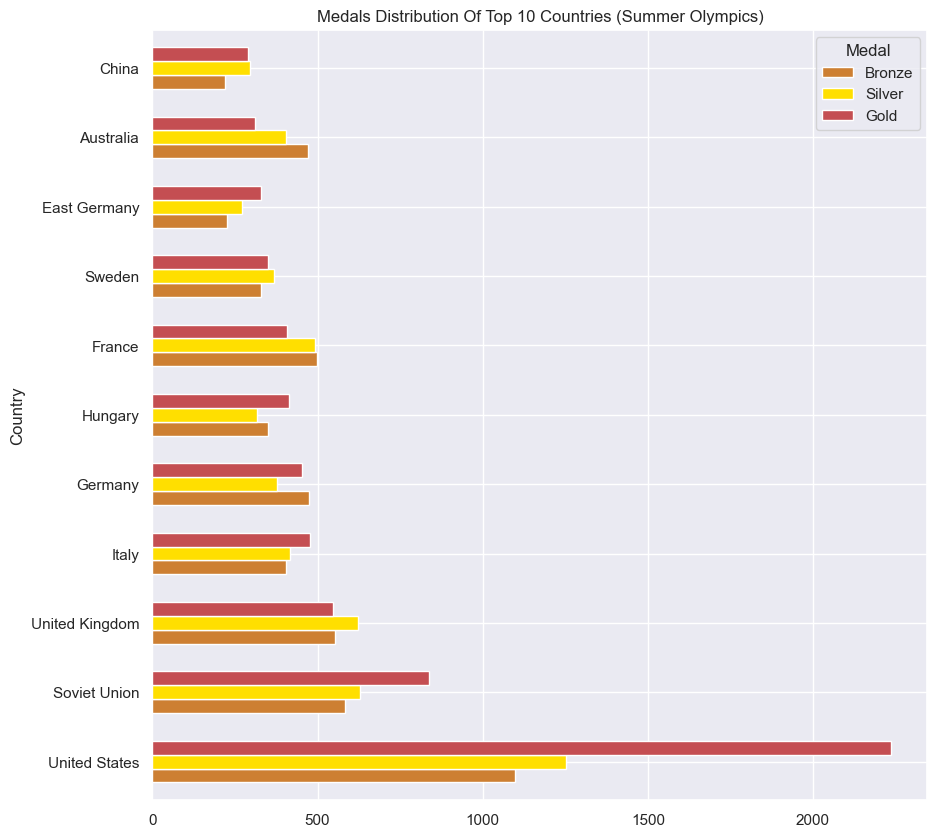

In [88]:
top_10.plot.barh(width=0.6,color=['#CD7F32','#FFDF00','r'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

In [127]:
# men won medal in country in summer
summer_mens=summer[summer['Gender']=="Men"]


In [128]:
# how many countries does men Athlete achieve the medals
Men=summer_mens.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
Men=Men.pivot('Athlete','Medal','Country')
Men

C:\Users\EL King\AppData\Local\Temp\ipykernel_6356\2675803028.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  Men=Men.pivot('Athlete','Medal','Country')


Medal,Bronze,Silver,Gold
Athlete,,,
- Johnson,1,0,1
..... Daumain,1,0,0
A. Albert,0,0,1
A. B. Zumelzu,0,1,0
A. Bögli,0,1,0
...,...,...,...
Ödön Tersztyanszky,1,1,1
Ödön Tery,0,1,0
Ödön Zombori,0,1,1


In [129]:
# the men_10 who score the medal in country
men_10=Men.sort_values(by='Gold',ascending=False)[:11]
men_10

Medal,Bronze,Silver,Gold
Athlete,,,
Michael Phelps,2,2,18
Carl Lewis,0,1,9
Mark Spitz,1,1,9
Paavo Nurmi,0,3,9
Ray Ewry,0,0,8
Sawao Kato,1,3,8
Matthew Biondi,1,2,8
Aladar Gerevich,2,1,7
Nikolay Andrianov,3,5,7


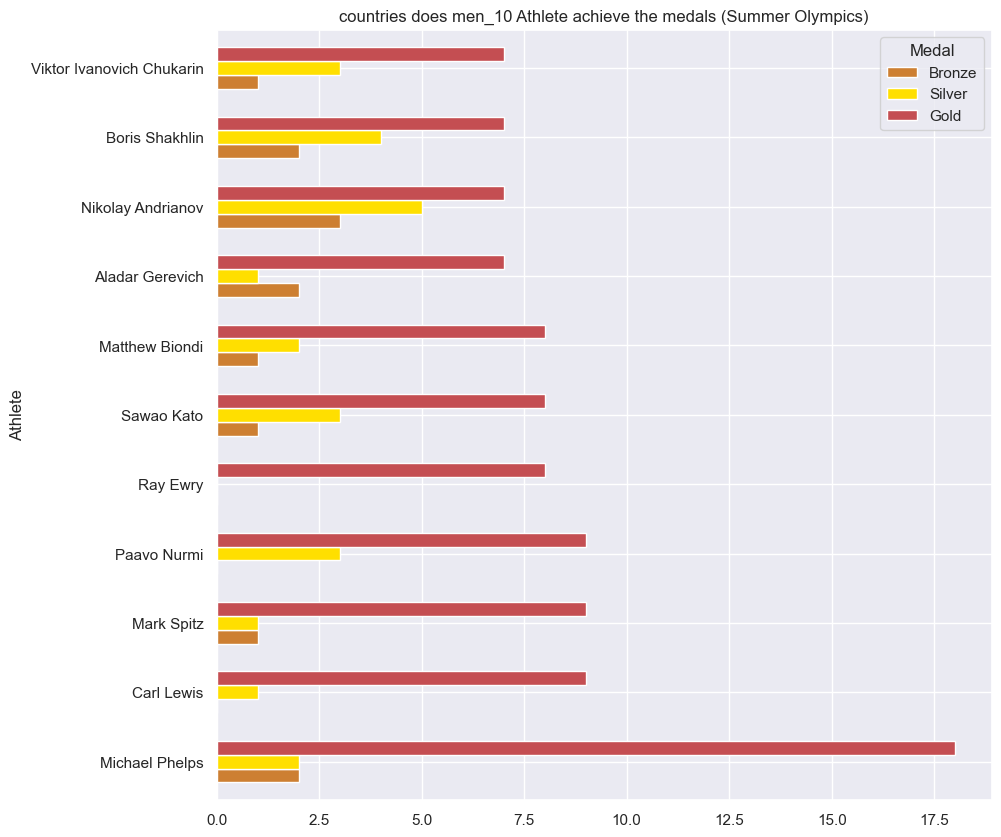

In [130]:
men_10.plot.barh(width=0.6,color=['#CD7F32','#FFDF00','r'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('countries does men_10 Athlete achieve the medals (Summer Olympics)')
plt.show()

In [135]:
# women won medal in country in summer
summer_womens=summer[summer['Gender']=="Women"]

In [136]:
# how many countries does men Athlete achieve the medals
womens=summer_womens.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
womens=womens.pivot('Athlete','Medal','Country')
womens

C:\Users\EL King\AppData\Local\Temp\ipykernel_6356\819195201.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  womens=womens.pivot('Athlete','Medal','Country')


Medal,Bronze,Silver,Gold
Athlete,,,
A Lam Shin,0,1,0
Aagje Ada Kok,0,2,1
Abby Bishop,1,0,0
Abby Wambach,0,0,2
Abigail Johnston,0,1,0
...,...,...,...
Zsuzsa Szocs,2,0,0
Zsuzsanna Janosi-Nemeth,1,0,0
Zsuzsanna Voros,0,0,1


In [137]:
# the women_10 who score the medal in country
women_10=womens.sort_values(by='Gold',ascending=False)[:11]
women_10

Medal,Bronze,Silver,Gold
Athlete,,,
Larisa Latynina,4,5,9
Birgit Fischer,0,4,8
Jenny Thompson,1,3,8
Vera Caslavska,0,4,7
Amy Van Dyken,0,0,6
Kristin Otto,0,0,6
Valentina Vezzali,2,1,6
Agnes Keleti,2,3,5
Anastasia Davydova,0,0,5


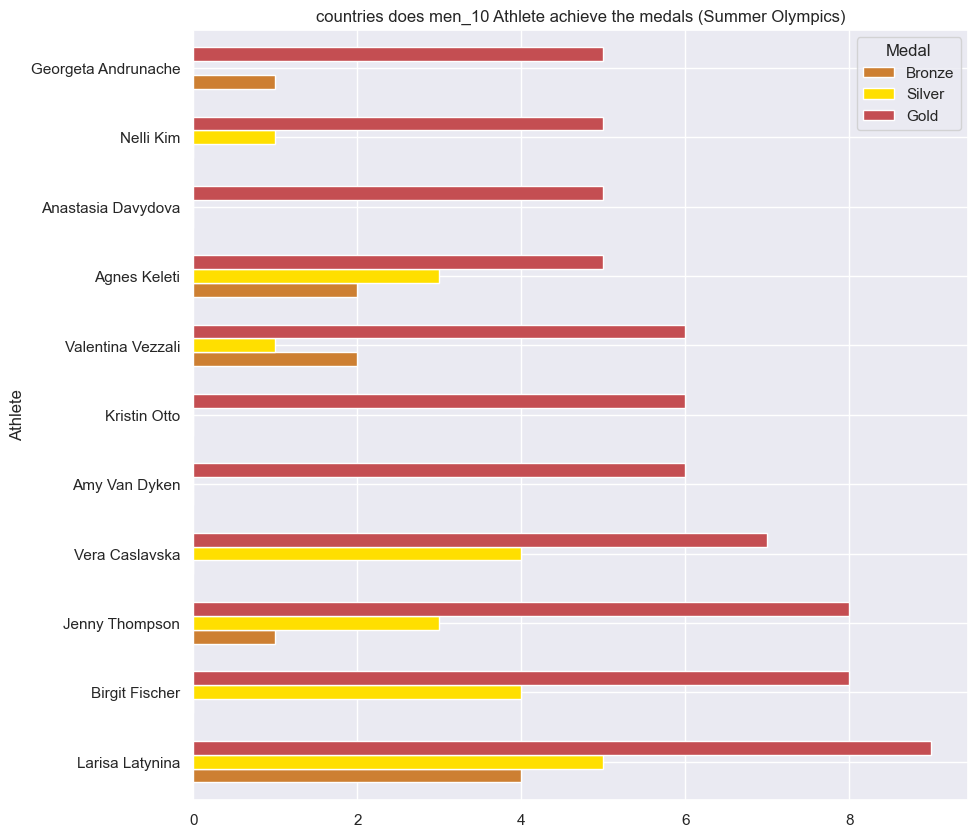

In [138]:
women_10.plot.barh(width=0.6,color=['#CD7F32','#FFDF00','r'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('countries does men_10 Athlete achieve the medals (Summer Olympics)')
plt.show()

### The largest Country Score the Medal in winter

In [139]:
# number of medal which country achieve its in winter
winter['Country'].value_counts().head()

United States    653
Canada           625
Norway           457
Soviet Union     440
Finland          434
Name: Country, dtype: int64

In [140]:
#Calculate the medals per each country for the best male and females athletes in all of the winter editions and visualize the results
Medals_Country_winter=winter.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
Medals_Country_winter=Medals_Country_winter.pivot('Country','Medal','Gender')
Medals_Country_winter.head()

C:\Users\EL King\AppData\Local\Temp\ipykernel_6356\3288306190.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  Medals_Country_winter=Medals_Country_winter.pivot('Country','Medal','Gender')


Medal,Bronze,Silver,Gold
Country,,,
Australia,7,3,5
Austria,103,98,79
Belarus,5,4,6
Belgium,7,4,2
Bulgaria,3,2,1


In [141]:
winter_top_10=Medals_Country_winter.sort_values(by='Gold',ascending=False)[:11]
winter_top_10

Medal,Bronze,Silver,Gold
Country,,,
Canada,107,203,315
Soviet Union,93,97,250
United States,167,319,167
Norway,127,171,159
Germany,97,126,137
Sweden,177,129,127
Russia,79,90,94
Austria,103,98,79
Switzerland,132,77,76


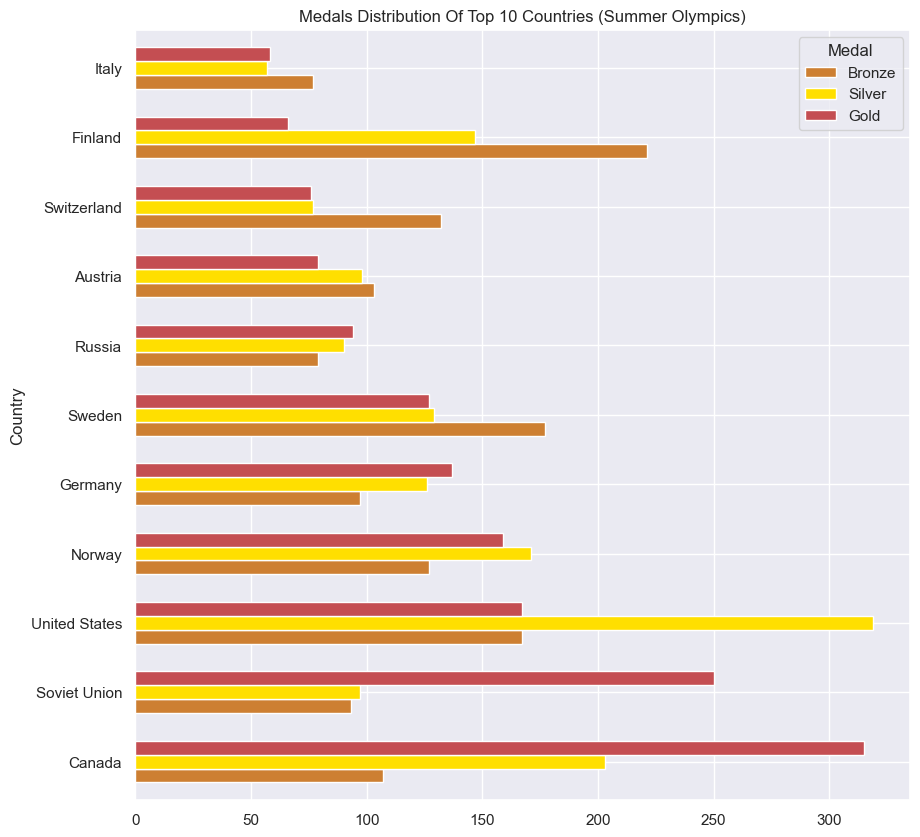

In [142]:
winter_top_10.plot.barh(width=0.6,color=['#CD7F32','#FFDF00','r'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

In [177]:
# men won medal in country in winter
winter_Men=winter[winter['Gender']=="Men"]

In [178]:
# how many countries does men Athlete achieve the medals
Men_Winter=winter_Men.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
Men_Winter=Men_Winter.pivot('Athlete','Medal','Country')
Men_Winter

C:\Users\EL King\AppData\Local\Temp\ipykernel_6356\2991298730.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  Men_Winter=Men_Winter.pivot('Athlete','Medal','Country')


Medal,Bronze,Silver,Gold
Athlete,,,
A. ESKELINEN,0,1,0
A. GILPIN,0,0,1
Aaron MILLER,0,1,0
Adam DEADMARSH,0,1,0
Adam ENRIGHT,0,0,1
...,...,...,...
Zhongqing LIU,1,0,0
Zinetula BILJALETDINOV,0,1,1
Zintis EKMANIS,1,0,0


In [179]:
# the men_10 who score the medal in country
Men_Winter_10=Men_Winter.sort_values(by='Gold',ascending=False)[:11]
Men_Winter_10

Medal,Bronze,Silver,Gold
Athlete,,,
Ole Einar BJOERNDALEN,1,4,8
Björn DAEHLIE,0,4,8
Eric HEIDEN,0,0,5
Clas THUNBERG,1,1,5
Thomas ALSGAARD,0,1,5
Sven FISCHER,2,2,4
Simon AMMANN,0,0,4
Yevgeny GRISHIN,0,1,4
Johann Olav KOSS,0,1,4


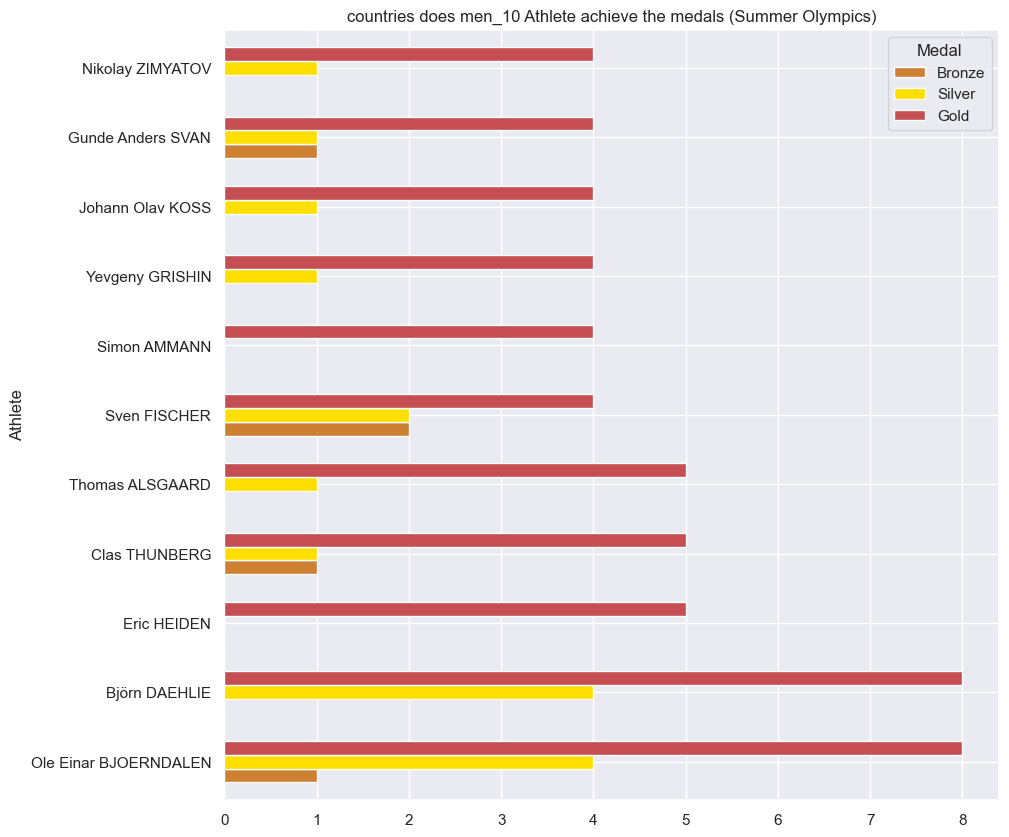

In [180]:
Men_Winter_10.plot.barh(width=0.6,color=['#CD7F32','#FFDF00','r'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('countries does men_10 Athlete achieve the medals (Summer Olympics)')
plt.show()

In [195]:
# women won medal in country in winter
Winter_Wom=winter[winter['Gender']=="Women"]

In [196]:
# how many countries does men Athlete achieve the medals
women_win=Winter_Wom.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
women_win=women_win.pivot('Athlete','Medal','Country')
women_win

C:\Users\EL King\AppData\Local\Temp\ipykernel_6356\402297965.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  women_win=women_win.pivot('Athlete','Medal','Country')


Medal,Bronze,Silver,Gold
Athlete,,,
Adelina SOTNIKOVA,0,0,1
Adriana VISSER,0,1,0
Agnes KNOCHENHAUER,0,1,0
Aino Kaisa SAARINEN,1,0,0
Aino-Kaisa SAARINEN,2,2,0
...,...,...,...
Yuna KIM,0,1,1
Yvonne RUEGG,0,0,1
Yvonne VAN GENNIP,0,0,3


In [197]:
# the women_10 who score the medal in country
women_win_10=women_win.sort_values(by='Gold',ascending=False)[:11]
women_win_10

Medal,Bronze,Silver,Gold
Athlete,,,
Marit BJOERGEN,1,2,6
Ljubov EGOROVA,0,3,6
Lidiya SKOBLIKOVA,0,0,6
Claudia PECHSTEIN,2,2,5
Larissa LAZUTINA,1,1,5
Bonnie BLAIR,1,0,5
Hayley WICKENHEISER,0,1,4
Meng WANG,1,1,4
Caroline OUELLETTE,0,0,4


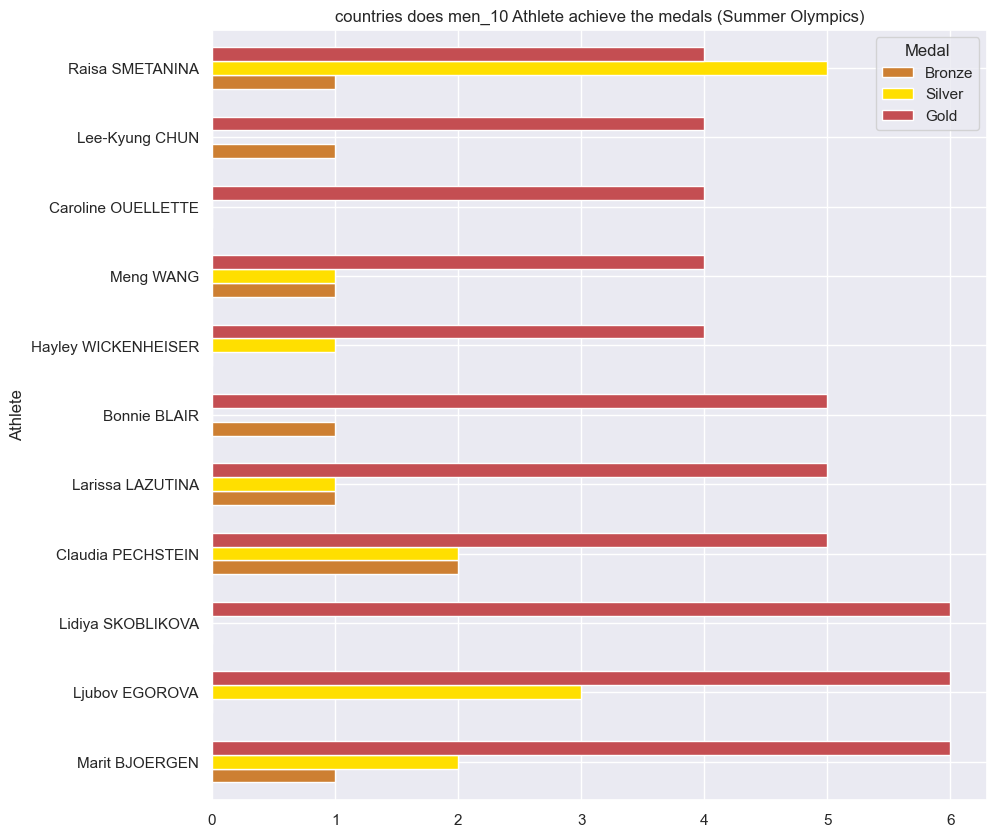

In [194]:
women_win_10.plot.barh(width=0.6,color=['#CD7F32','#FFDF00','r'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('countries does men_10 Athlete achieve the medals (Summer Olympics)')
plt.show()

# Good luck 🤞😎